In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


## Data Loading

In [4]:
true_df=pd.read_csv('True.csv')
true_df['Label']='True'

fake_df =pd.read_csv('Fake.csv')
fake_df['Label']='Fake'

df=pd.concat([true_df,fake_df],ignore_index=True).sample(frac=1,random_state=42)
df.head()

,title,text,subject,date,Label
22216,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",Fake
27917,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",Fake
25007,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",Fake
1377,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",True
32476,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",Fake


In [5]:
print("Dimensions of the data frame:", df.shape)

Dimensions of the data frame: (44898, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 22216 to 15795
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(209)

In [9]:
df.drop_duplicates(inplace=True)

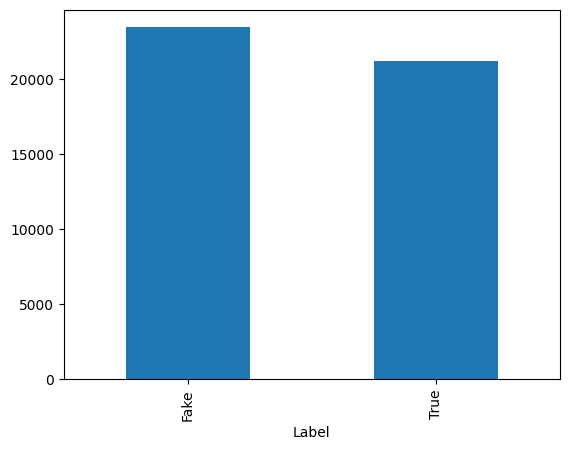

In [10]:
df['Label'].value_counts().plot(kind='bar')
plt.show()

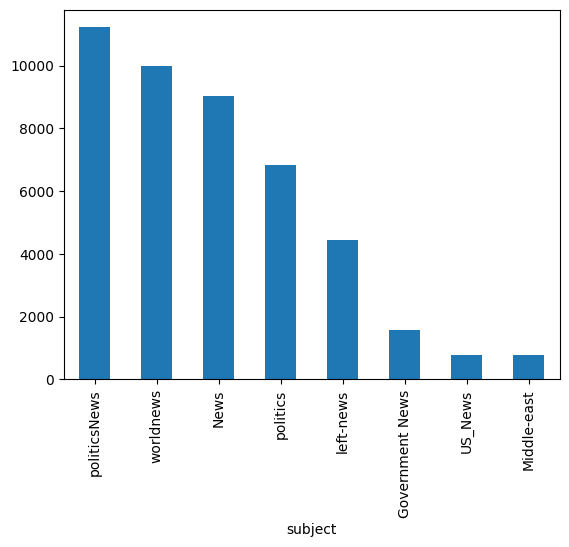

In [11]:
df['subject'].value_counts().plot(kind='bar')
plt.show()

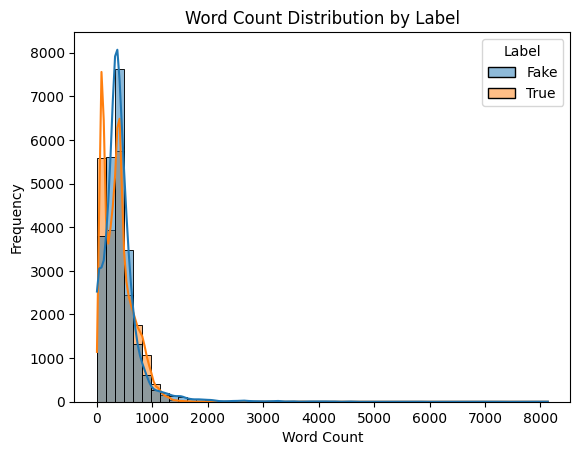

In [12]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

sns.histplot(data=df, x='word_count', hue='Label', kde=True, bins=50)

plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Word Count Distribution by Label")
plt.show()

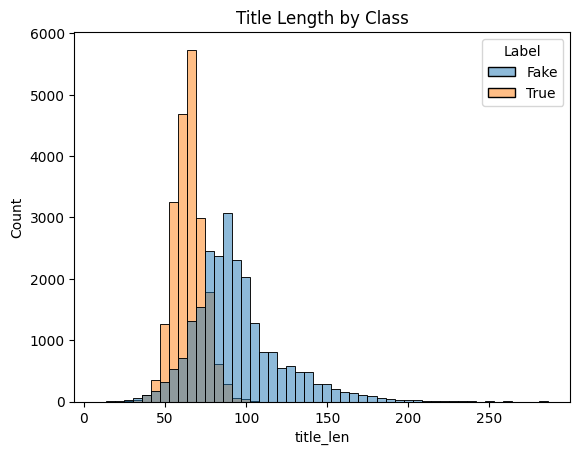

In [13]:
df['title_len'] = df['title'].apply(lambda x: len(str(x)))

sns.histplot(data=df, x='title_len', hue='Label', bins=50)
plt.xticks()
plt.title("Title Length by Class")
plt.show()

In [14]:
df['content'] = df['title']+' '+df['text']
df.head()

,title,text,subject,date,Label,word_count,title_len,content
22216,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",Fake,361,76,BREAKING: GOP Chairman Grassley Has Had Enoug...
27917,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",Fake,495,71,Failed GOP Candidates Remembered In Hilarious...
25007,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",Fake,379,88,Mike Pence’s New DC Neighbors Are HILARIOUSLY...
1377,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",True,88,64,California AG pledges to defend birth control ...
32476,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",Fake,138,124,AZ RANCHERS Living On US-Mexico Border Destroy...


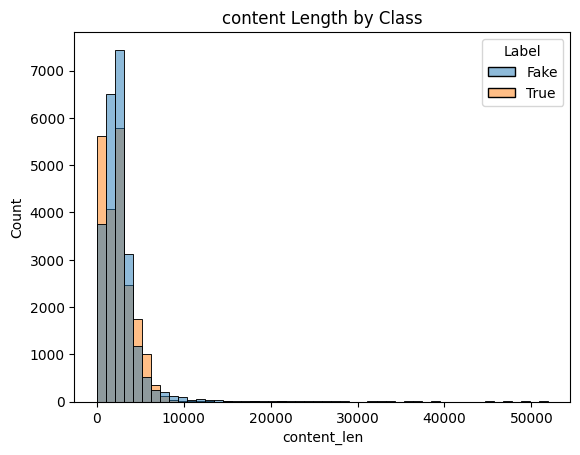

In [15]:
df['content_len'] = df['content'].apply(lambda x: len(str(x)))

sns.histplot(data=df, x='content_len', hue='Label', bins=50)
plt.xticks()
plt.title("content Length by Class")
plt.show()

Preprocessing

In [21]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # Additional resource that might be needed
nltk.download('omw-1.4')  # Open Multilingual Wordnet

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()  # Ensure text is string and convert to lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'\W', ' ', text)  # remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = re.sub(r'\d+', '', text) # remove digits
    
    # Using word_tokenize directly without punkt_tab
    words = text.split()  # Simple splitting as fallback
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

[nltk_data] Downloading package punkt to /Users/os/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/os/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/os/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/os/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /Users/os/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
df.drop(columns=['content'],inplace=True)

In [20]:
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_title'] = df['title'].apply(clean_text)

In [22]:
x = df.drop(columns=['Label'])
y = df['Label']  

X_temp, X_test, y_temp_test, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp_test, test_size=0.2, random_state=42, shuffle=True)


In [27]:
print(f"Training set: {len(X_train)} articles")
print(f"Validation set: {len(X_val)} articles") 
print(f"Test set: {len(X_test)} articles")

Training set: 28600 articles
Validation set: 7151 articles
Test set: 8938 articles


In [ ]:
# Combine title and text, repeating title 3 times to give it more weight
X_train['combined_text'] = X_train['cleaned_title'] + ' ' + X_train['cleaned_title'] + ' ' + X_train['cleaned_title'] + ' ' + X_train['cleaned_text']
X_val['combined_text'] = X_val['cleaned_title'] + ' ' + X_val['cleaned_title'] + ' ' + X_val['cleaned_title'] + ' ' + X_val['cleaned_text']
X_test['combined_text'] = X_test['cleaned_title'] + ' ' + X_test['cleaned_title'] + ' ' + X_test['cleaned_title'] + ' ' + X_test['cleaned_text']

# Single vectorizer for combined text
tfidf_vectorizer = TfidfVectorizer(
    max_features=7000,    
    ngram_range=(1, 2),   
    min_df=3,            
    max_df=0.8,          
    stop_words='english'
)

In [32]:
# Create TF-IDF features for combined text
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['combined_text'])
X_val_tfidf = tfidf_vectorizer.transform(X_val['combined_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['combined_text'])

print("Shape of features:")
print(f"Training set: {X_train_tfidf.shape}")
print(f"Validation set: {X_val_tfidf.shape}")
print(f"Test set: {X_test_tfidf.shape}")

# Let's also see the most important features
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\nSample of features (first 20):")
print(feature_names[:20])

Shape of features:
Training set: (28600, 7000)
Validation set: (7151, 7000)
Test set: (8938, 7000)

Sample of features (first 20):
['abadi' 'abandon' 'abandoned' 'abbas' 'abbott' 'abc' 'abc news'
 'abdullah' 'abe' 'abedin' 'ability' 'able' 'aboard' 'abortion' 'abroad'
 'abruptly' 'absence' 'absolute' 'absolutely' 'absurd']
